# **Kernel PCA step by step**

Text(0.5, 1.0, 'Original data')

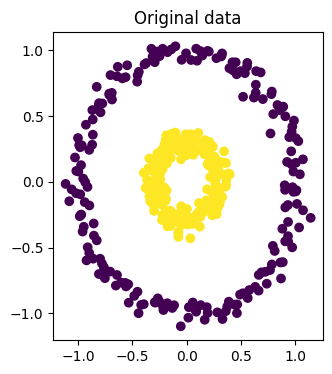

In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles
import numpy as np

# Generate the dataset
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

# Original data plot
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original data')

In [2]:
X_centered = X - np.mean(X, axis=0)

Text(0.5, 1.0, 'Original data')

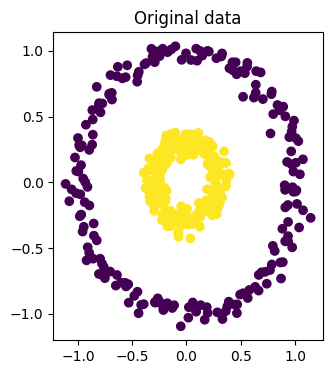

In [3]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
plt.scatter(X_centered[:, 0], X_centered[:, 1], c=y)
plt.title('Original data')

In [4]:
def rbf_kernel(x1, x2, gamma=0.1):
    distance = np.linalg.norm(x1 - x2) ** 2
    return np.exp(-gamma * distance)

# Create the kernel matrix
n_samples = X.shape[0]
K = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        K[i, j] = rbf_kernel(X_centered[i], X_centered[j])

In [5]:
K.shape

(400, 400)

In [6]:
from scipy.linalg import eigh
eigenvalues, eigenvectors = eigh(K)

In [7]:
eigenvectors.shape

(400, 400)

In [8]:
# Reverse the arrays as eigh returns them in ascending order
eigenvalues = eigenvalues[::-1]
eigenvectors = eigenvectors[:, ::-1]

In [9]:
k = 2
X_kpca = eigenvectors[:, :k]

Text(0.5, 1.0, 'Data after Kernel PCA in 1D')

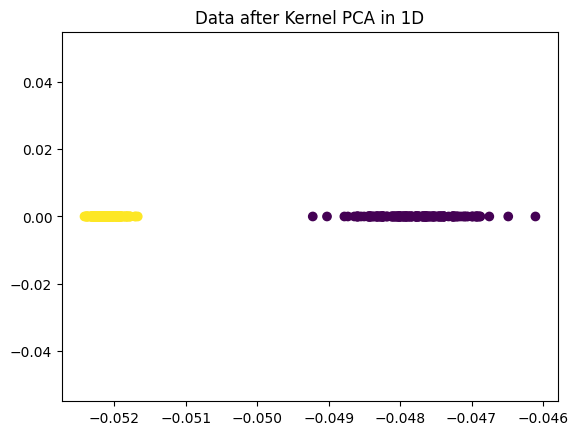

In [10]:
plt.scatter(X_kpca[:, 0], np.zeros((400,)), c=y)
plt.title('Data after Kernel PCA in 1D')